Model R² (Linear): 0.575
Model R² (Random Forest): 0.716


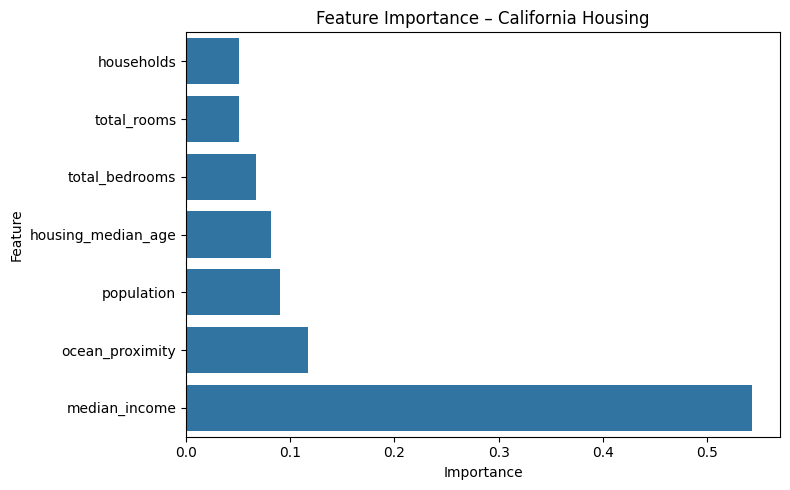

In [4]:
# 🏡 California Housing Price Predictor – No Upload, No API, No KaggleHub

# 📦 STEP 1: Install dependencies
!pip install -q ipywidgets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import ipywidgets as widgets
from IPython.display import display, clear_output

# 📦 STEP 2: Load dataset from public URL
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
df = pd.read_csv(url)

# 📊 STEP 3: Preprocessing – Clean and select key features
df.dropna(inplace=True)
df['ocean_proximity'] = df['ocean_proximity'].astype('category').cat.codes
features = ['median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'ocean_proximity']
X = df[features]
y = df['median_house_value']

# 📊 STEP 4: Train/Test split + modeling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

print("Model R² (Linear):", round(r2_score(y_test, lr.predict(X_test)), 3))
print("Model R² (Random Forest):", round(r2_score(y_test, rf.predict(X_test)), 3))

# 📈 STEP 5: Feature Importance
importance = rf.feature_importances_
feat_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance}).sort_values(by='Importance')

plt.figure(figsize=(8, 5))
sns.barplot(data=feat_df, x='Importance', y='Feature')
plt.title('Feature Importance – California Housing')
plt.tight_layout()
plt.show()

# 📊 STEP 6: Interactive UI to predict price
income = widgets.FloatSlider(min=0.5, max=15.0, step=0.1, value=4.0, description='Income')
age = widgets.IntSlider(min=1, max=52, value=20, description='House Age')
rooms = widgets.IntSlider(min=100, max=10000, value=2000, step=100, description='Total Rooms')
beds = widgets.IntSlider(min=1, max=2000, value=300, step=50, description='Bedrooms')
pop = widgets.IntSlider(min=50, max=20000, value=1000, step=100, description='Population')
holds = widgets.IntSlider(min=1, max=5000, value=500, step=50, description='Households')
ocean = widgets.IntSlider(min=0, max=4, value=0, step=1, description='Ocean Proximity')
btn = widgets.Button(description='Predict Price', button_style='success')
out = widgets.Output()

def predict_house_price(b):
    with out:
        clear_output()
        input_data = np.array([[income.value, age.value, rooms.value, beds.value, pop.value, holds.value, ocean.value]])
        price = rf.predict(input_data)[0]
        print(f"Estimated House Price: ${price:,.0f}")

btn.on_click(predict_house_price)
display(widgets.VBox([income, age, rooms, beds, pop, holds, ocean, btn, out]))
